<a href="https://colab.research.google.com/github/AlejandraCLeg/Curso.Prep.Henry/blob/master/Prueba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

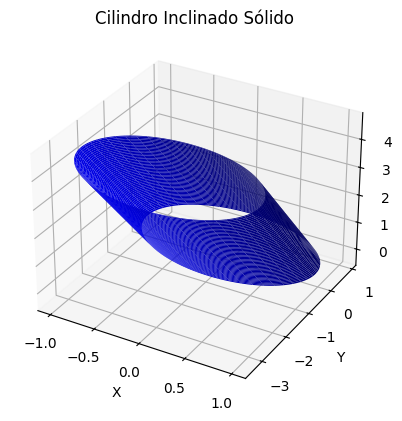

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del cilindro
radio = 1.0
altura = 5.0
inclinacion = np.pi / 6  # 30 grados en radianes

# Generar puntos para el cilindro
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, altura, 100)
theta, z = np.meshgrid(theta, z)

# Coordenadas del cilindro sin inclinación
x = radio * np.cos(theta)
y = radio * np.sin(theta)

# Aplicar la inclinación
x_inclinado = x
y_inclinado = y * np.cos(inclinacion) - z * np.sin(inclinacion)
z_inclinado = y * np.sin(inclinacion) + z * np.cos(inclinacion)

# Visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar el cilindro inclinado
ax.plot_surface(x_inclinado, y_inclinado, z_inclinado, color='b', alpha=1.0)

# Configuración de la visualización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cilindro Inclinado Sólido')

# Mostrar la gráfica
plt.show()

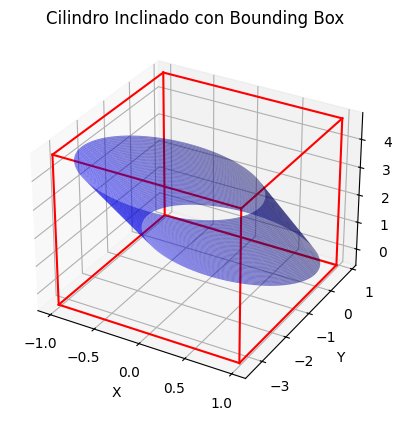

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del cilindro
radio = 1.0
altura = 5.0
inclinacion = np.pi / 6  # 30 grados en radianes

# Generar puntos para el cilindro
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, altura, 100)
theta, z = np.meshgrid(theta, z)

# Coordenadas del cilindro sin inclinación
x = radio * np.cos(theta)
y = radio * np.sin(theta)

# Aplicar la inclinación
x_inclinado = x
y_inclinado = y * np.cos(inclinacion) - z * np.sin(inclinacion)
z_inclinado = y * np.sin(inclinacion) + z * np.cos(inclinacion)

# Calcular los límites del bounding box
x_min, x_max = np.min(x_inclinado), np.max(x_inclinado)
y_min, y_max = np.min(y_inclinado), np.max(y_inclinado)
z_min, z_max = np.min(z_inclinado), np.max(z_inclinado)

# Crear los vértices del bounding box
bounding_box = np.array([
    [x_min, y_min, z_min], [x_max, y_min, z_min],
    [x_max, y_max, z_min], [x_min, y_max, z_min],
    [x_min, y_min, z_max], [x_max, y_min, z_max],
    [x_max, y_max, z_max], [x_min, y_max, z_max]
])

# Definir las conexiones entre los vértices
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

# Visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar el cilindro inclinado
ax.plot_surface(x_inclinado, y_inclinado, z_inclinado, color='b', alpha=0.5)

# Graficar el bounding box
for edge in edges:
    p1, p2 = bounding_box[edge[0]], bounding_box[edge[1]]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 'r')

# Configuración de la visualización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cilindro Inclinado con Bounding Box')

# Mostrar la gráfica
plt.show()



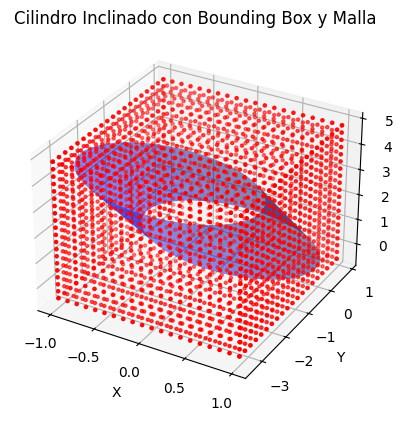

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del cilindro
radio = 1.0
altura = 5.0
inclinacion = np.pi / 6  # 30 grados en radianes

# Generar puntos para el cilindro
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, altura, 100)
theta, z = np.meshgrid(theta, z)

# Coordenadas del cilindro sin inclinación
x = radio * np.cos(theta)
y = radio * np.sin(theta)

# Aplicar la inclinación
x_inclinado = x
y_inclinado = y * np.cos(inclinacion) - z * np.sin(inclinacion)
z_inclinado = y * np.sin(inclinacion) + z * np.cos(inclinacion)

# Calcular los límites del bounding box
x_min, x_max = np.min(x_inclinado), np.max(x_inclinado)
y_min, y_max = np.min(y_inclinado), np.max(y_inclinado)
z_min, z_max = np.min(z_inclinado), np.max(z_inclinado)

# Crear malla rectangular del bounding box
n_points = 20  # Número de puntos por lado
x_vals = np.linspace(x_min, x_max, n_points)
y_vals = np.linspace(y_min, y_max, n_points)
z_vals = np.linspace(z_min, z_max, n_points)

# Generar coordenadas de la malla en las 6 caras del bounding box
malla = []

# Caras XY (z = min y max)
for x in x_vals:
    for y in y_vals:
        malla.append([x, y, z_min])
        malla.append([x, y, z_max])

# Caras XZ (y = min y max)
for x in x_vals:
    for z in z_vals:
        malla.append([x, y_min, z])
        malla.append([x, y_max, z])

# Caras YZ (x = min y max)
for y in y_vals:
    for z in z_vals:
        malla.append([x_min, y, z])
        malla.append([x_max, y, z])

malla = np.array(malla)

# Guardar la malla en un archivo CSV
np.savetxt("bounding_box_malla.csv", malla, delimiter=",", header="X,Y,Z", comments="")

# Visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar el cilindro inclinado
ax.plot_surface(x_inclinado, y_inclinado, z_inclinado, color='b', alpha=0.5)

# Graficar la malla del bounding box
ax.scatter(malla[:, 0], malla[:, 1], malla[:, 2], color='r', s=5)

# Configuración de la visualización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cilindro Inclinado con Bounding Box y Malla')

# Mostrar la gráfica
plt.show()


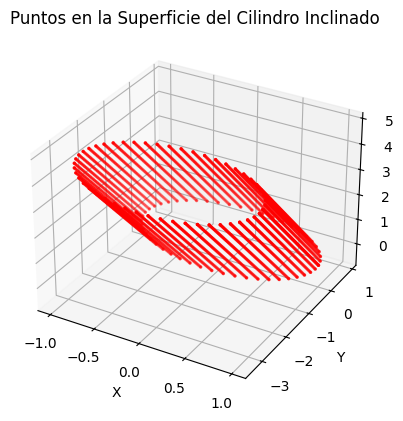

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del cilindro
radio = 1.0
altura = 5.0
inclinacion = np.pi / 6  # 30 grados en radianes

# Número de puntos en cada dirección
num_puntos_circunferencia = 50  # Resolución en la circunferencia
num_puntos_altura = 50  # Resolución en la altura

# Generar puntos en la superficie del cilindro
theta = np.linspace(0, 2 * np.pi, num_puntos_circunferencia)  # Ángulos de la base
z = np.linspace(0, altura, num_puntos_altura)  # Altura del cilindro

theta, z = np.meshgrid(theta, z)  # Crear malla de ángulos y alturas

# Coordenadas en cilindro recto
x = radio * np.cos(theta)
y = radio * np.sin(theta)

# Aplicar la inclinación
x_inclinado = x
y_inclinado = y * np.cos(inclinacion) - z * np.sin(inclinacion)
z_inclinado = y * np.sin(inclinacion) + z * np.cos(inclinacion)

# Generar puntos en las bases (círculos superior e inferior)
num_puntos_base = 50  # Número de puntos en cada base
theta_base = np.linspace(0, 2 * np.pi, num_puntos_base)

# Base inferior
x_base_inf = radio * np.cos(theta_base)
y_base_inf = radio * np.sin(theta_base)
z_base_inf = np.zeros_like(x_base_inf)

# Base superior (desplazada en altura)
x_base_sup = radio * np.cos(theta_base)
y_base_sup = radio * np.sin(theta_base)
z_base_sup = np.full_like(x_base_sup, altura)

# Aplicar la inclinación a las bases
x_base_inf_inc = x_base_inf
y_base_inf_inc = y_base_inf * np.cos(inclinacion) - z_base_inf * np.sin(inclinacion)
z_base_inf_inc = y_base_inf * np.sin(inclinacion) + z_base_inf * np.cos(inclinacion)

x_base_sup_inc = x_base_sup
y_base_sup_inc = y_base_sup * np.cos(inclinacion) - z_base_sup * np.sin(inclinacion)
z_base_sup_inc = y_base_sup * np.sin(inclinacion) + z_base_sup * np.cos(inclinacion)

# Concatenar todos los puntos (cuerpo y bases)
puntos_cilindro = np.column_stack((
    np.concatenate([x_inclinado.ravel(), x_base_inf_inc, x_base_sup_inc]),
    np.concatenate([y_inclinado.ravel(), y_base_inf_inc, y_base_sup_inc]),
    np.concatenate([z_inclinado.ravel(), z_base_inf_inc, z_base_sup_inc])
))

# Guardar los puntos en un archivo CSV
np.savetxt("cilindro_malla.csv", puntos_cilindro, delimiter=",", header="X,Y,Z", comments="")

# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos del cilindro
ax.scatter(puntos_cilindro[:, 0], puntos_cilindro[:, 1], puntos_cilindro[:, 2], color='r', s=2)

# Configuración de la visualización
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Puntos en la Superficie del Cilindro Inclinado')

# Mostrar la gráfica
plt.show()
